# Calculate optimal 2 by 2 with 30 degree angles

In [17]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.utils import get_input_count
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs
from metabatt.reinforce.agents import QAgentReplayMemory

prefill replay memory
start training
 new max record arrange grid:  5.603971543312206
 new max record arrange grid:  5.650478074221982
   10 mean training reward:  4.91
   20 mean training reward:  4.17
   30 mean training reward:  4.86
   40 mean training reward:  4.34
   50 mean training reward:  4.32
 new max record arrange grid:  5.776855589390509
   60 mean training reward:  4.80
   70 mean training reward:  4.50
   80 mean training reward:  4.84
   90 mean training reward:  4.22
  100 mean training reward:  4.83
 new max record arrange grid:  6.094424160712927
  110 mean training reward:  4.70
  120 mean training reward:  4.02
 new max record arrange grid:  6.137175812298153
  130 mean training reward:  4.63
  140 mean training reward:  4.48
  150 mean training reward:  5.08
  160 mean training reward:  4.54
  170 mean training reward:  4.50
  180 mean training reward:  4.85
  190 mean training reward:  4.54
  200 mean training reward:  5.34
  210 mean training reward:  5.00
  22

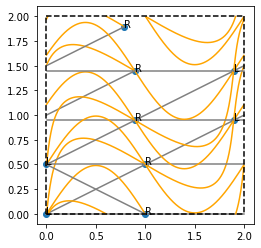

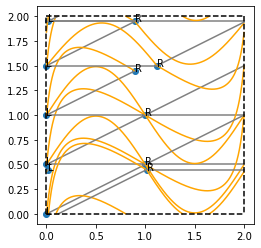

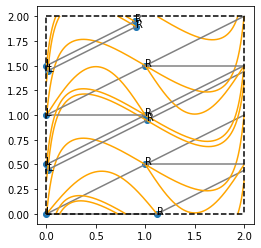

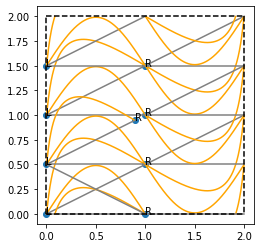

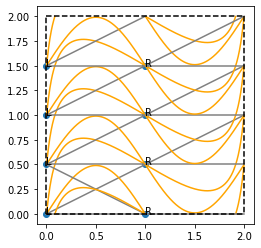

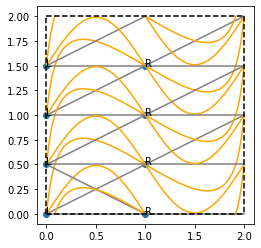

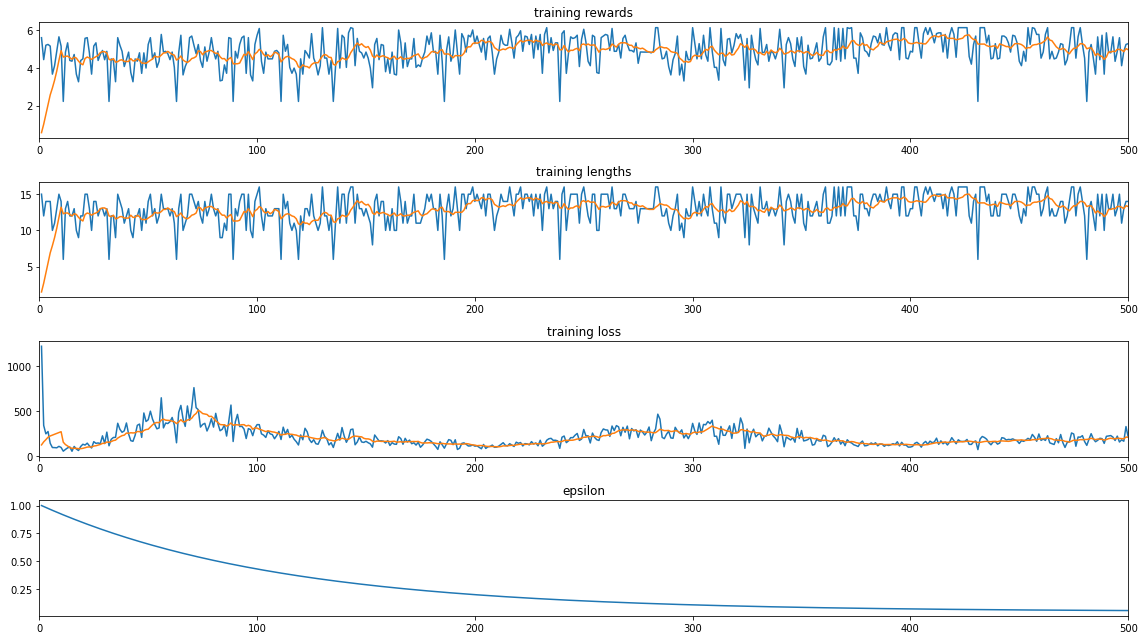

[5.603971543312206, 5.603971543312206, 5.650478074221982, 5.650478074221982, 5.776855589390509, 5.776855589390509, 6.094424160712927, 6.094424160712927, 6.137175812298153, 6.137175812298153, 6.137175812298154, 6.137175812298154]
[1, 9, 9, 56, 56, 101, 101, 130, 130, 233, 233, 500]


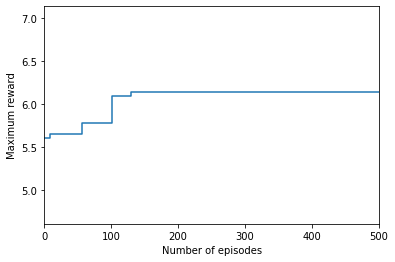

In [2]:
lengths = [1.0, 1.118033988749895]
angles = [0, 26.565051177077994]
n_inputs = get_input_count(angles)
# we start from scratch here
subgraphs = Subgraphs(angles=angles,
                      lengths=lengths)

# create the environment
env = MetabattEnvSubgraphs(n_cells_x=3,
                           n_cells_y=3,
                           subgraphs=subgraphs)

NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
# create an agent and set hyperparameters
agent = QAgentReplayMemory(env=env,
                          n_inputs=7, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=64,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=1000,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=True)  # save the highest ranking graph state

# train the agent
agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished

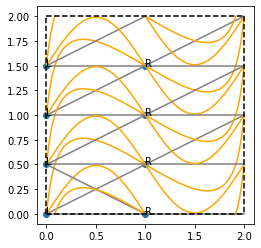

In [3]:
best_graph = Graph.load_graph_state('best_graph')
best_graph.plot()

In [4]:
# save model parameters
agent.save_hyperparameters(fname='hyperparams')
# for saving the state of the model simply do
agent.save_model(agent.policy_dqn, file_name='model')

In [5]:
max(agent.rewards)

6.137175812298154

In [6]:
load_agent = QAgentReplayMemory.from_hyperparameters('hyperparams')
best_model = load_agent.load_model(file_name='model')

# load_agent.predict(model=best_model, num_episodes=20, epsilon=0, save_best_graph=False)

[0.000, 0.000](L) => [1.000, 0.500](R)
[1.000, 0.500](R) => [0.000, 1.000](L)
[0.000, 1.000](L) => [1.000, 1.500](R)
[1.000, 0.500](R) => [0.000, 0.500](L)
[0.000, 0.500](L) => [1.000, 1.000](R)
[1.000, 1.500](R) => [0.000, 0.000](L)
[0.000, 0.000](L) => [1.000, 0.000](R)
[1.000, 1.500](R) => [0.000, 1.500](L)
[1.000, 0.000](R) => [0.000, 0.500](L)
[0.000, 1.500](L) => [1.000, 0.000](R)
[1.000, 1.000](R) => [0.000, 1.500](L)
[1.000, 1.000](R) => [0.000, 1.000](L)
[0.000, 1.500](L) => [1.000, 1.500](R)
[0.000, 1.000](L) => [1.000, 1.000](R)
[1.000, 0.000](R) => [0.000, 0.000](L)
[0.000, 0.500](L) => [1.000, 0.500](R)
